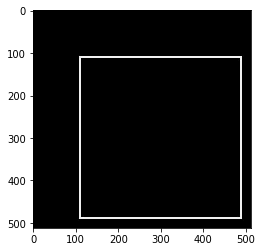

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = r"/home/yash/Desktop/KhashCapitals/Interview-master/Images"

# CATEGORIES = ["Green_circles", "Green_lines", "Green_Rectangles", "Green_Triangle", "Red_circles", "Red_lines", "Red_Rectangles",
#              "Red_Triangle"]
# CATEGORIES = ["green", "red"]
CATEGORIES = ["Sqaure", "circle", "line", "rectangle", "triangle"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array, Change colour here
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

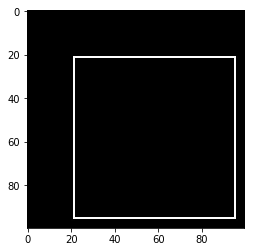

In [24]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [25]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array , Change it colour here
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 1500/1500 [00:23<00:00, 64.91it/s] 

7500


In [26]:
import random

random.shuffle(training_data)

In [27]:
for sample in training_data[:10]:
    print(sample)

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 2]
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 1]
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 3]
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,

In [28]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)) # Change it colour here

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Change it colour here

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [29]:
y

[2,
 0,
 1,
 3,
 3,
 0,
 4,
 4,
 0,
 2,
 1,
 2,
 0,
 4,
 3,
 3,
 2,
 2,
 3,
 4,
 0,
 3,
 0,
 2,
 2,
 1,
 2,
 3,
 0,
 0,
 4,
 1,
 0,
 3,
 4,
 2,
 3,
 0,
 2,
 1,
 3,
 0,
 4,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 3,
 2,
 0,
 3,
 2,
 2,
 2,
 2,
 4,
 1,
 3,
 1,
 4,
 2,
 0,
 3,
 4,
 2,
 2,
 0,
 2,
 2,
 4,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 4,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 4,
 4,
 3,
 3,
 0,
 4,
 2,
 1,
 2,
 4,
 1,
 4,
 4,
 0,
 1,
 2,
 1,
 0,
 4,
 4,
 1,
 0,
 4,
 3,
 4,
 0,
 3,
 3,
 2,
 2,
 2,
 3,
 1,
 3,
 1,
 2,
 3,
 0,
 0,
 3,
 0,
 0,
 2,
 3,
 3,
 3,
 3,
 4,
 0,
 3,
 2,
 0,
 1,
 1,
 3,
 0,
 4,
 4,
 3,
 2,
 1,
 3,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 3,
 1,
 4,
 4,
 1,
 2,
 2,
 4,
 1,
 4,
 4,
 4,
 3,
 1,
 4,
 3,
 4,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 3,
 1,
 4,
 1,
 4,
 0,
 0,
 1,
 3,
 4,
 3,
 2,
 1,
 0,
 4,
 1,
 0,
 3,
 0,
 1,
 0,
 2,
 3,
 3,
 0,
 4,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 3,
 4,
 2,
 4,
 2,
 3,
 2,
 0,
 4,
 4,
 3,
 4,
 0,
 1,
 0,
 2,
 1,
 2,
 3,
 4,
 4,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 4,
 0,


In [30]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [31]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [32]:
X

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [33]:
y

[2,
 0,
 1,
 3,
 3,
 0,
 4,
 4,
 0,
 2,
 1,
 2,
 0,
 4,
 3,
 3,
 2,
 2,
 3,
 4,
 0,
 3,
 0,
 2,
 2,
 1,
 2,
 3,
 0,
 0,
 4,
 1,
 0,
 3,
 4,
 2,
 3,
 0,
 2,
 1,
 3,
 0,
 4,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 3,
 2,
 0,
 3,
 2,
 2,
 2,
 2,
 4,
 1,
 3,
 1,
 4,
 2,
 0,
 3,
 4,
 2,
 2,
 0,
 2,
 2,
 4,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 4,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 4,
 4,
 3,
 3,
 0,
 4,
 2,
 1,
 2,
 4,
 1,
 4,
 4,
 0,
 1,
 2,
 1,
 0,
 4,
 4,
 1,
 0,
 4,
 3,
 4,
 0,
 3,
 3,
 2,
 2,
 2,
 3,
 1,
 3,
 1,
 2,
 3,
 0,
 0,
 3,
 0,
 0,
 2,
 3,
 3,
 3,
 3,
 4,
 0,
 3,
 2,
 0,
 1,
 1,
 3,
 0,
 4,
 4,
 3,
 2,
 1,
 3,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 3,
 1,
 4,
 4,
 1,
 2,
 2,
 4,
 1,
 4,
 4,
 4,
 3,
 1,
 4,
 3,
 4,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 3,
 1,
 4,
 1,
 4,
 0,
 0,
 1,
 3,
 4,
 3,
 2,
 1,
 0,
 4,
 1,
 0,
 3,
 0,
 1,
 0,
 2,
 3,
 3,
 0,
 4,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 3,
 4,
 2,
 4,
 2,
 3,
 2,
 0,
 4,
 4,
 3,
 4,
 0,
 1,
 0,
 2,
 1,
 2,
 3,
 4,
 4,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 4,
 0,
